In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r England_2021

In [5]:
England_2021

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
10,10,MM Ali (ENG),6,3,0,87,30,29.00,119,73.10,...,119,2,1/5,59.50,5.40,66.0,0,0,4,0
23,23,JM Bairstow (ENG),6,5,0,291,124,58.20,239,121.75,...,-,-,-,-,-,-,-,-,6,1
36,36,SW Billings (ENG),4,2,0,21,18,10.50,30,70.00,...,-,-,-,-,-,-,-,-,2,0
44,44,JC Buttler (ENG),3,3,0,17,15,5.66,25,68.00,...,-,-,-,-,-,-,-,-,4,0
47,47,BA Carse (ENG),3,2,1,43,31,43.00,52,82.69,...,136,6,5/61,22.66,5.44,25.0,0,1,0,0
60,60,Z Crawley (ENG),3,3,1,97,58*,48.50,85,114.11,...,-,-,-,-,-,-,-,-,4,0
62,62,SM Curran (ENG),6,3,2,116,95*,116.00,112,103.57,...,261,7,5/48,37.28,5.71,39.1,0,1,2,0
63,63,TK Curran (ENG),4,1,0,11,11,11.00,16,68.75,...,224,6,4/35,37.33,5.60,40.0,1,0,0,0
96,96,L Gregory (ENG),3,2,0,117,77,58.50,116,100.86,...,97,4,3/44,24.25,5.10,28.5,0,0,0,0
155,155,LS Livingstone (ENG),3,3,1,72,36,36.00,64,112.50,...,20,1,1/20,20.00,6.66,18.0,0,0,1,0


In [6]:
England_2021=England_2021.reset_index()

In [7]:
England_2021

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,10,10,MM Ali (ENG),6,3,0,87,30,29.00,119,...,119,2,1/5,59.50,5.40,66.0,0,0,4,0
1,23,23,JM Bairstow (ENG),6,5,0,291,124,58.20,239,...,-,-,-,-,-,-,-,-,6,1
2,36,36,SW Billings (ENG),4,2,0,21,18,10.50,30,...,-,-,-,-,-,-,-,-,2,0
3,44,44,JC Buttler (ENG),3,3,0,17,15,5.66,25,...,-,-,-,-,-,-,-,-,4,0
4,47,47,BA Carse (ENG),3,2,1,43,31,43.00,52,...,136,6,5/61,22.66,5.44,25.0,0,1,0,0
5,60,60,Z Crawley (ENG),3,3,1,97,58*,48.50,85,...,-,-,-,-,-,-,-,-,4,0
6,62,62,SM Curran (ENG),6,3,2,116,95*,116.00,112,...,261,7,5/48,37.28,5.71,39.1,0,1,2,0
7,63,63,TK Curran (ENG),4,1,0,11,11,11.00,16,...,224,6,4/35,37.33,5.60,40.0,1,0,0,0
8,96,96,L Gregory (ENG),3,2,0,117,77,58.50,116,...,97,4,3/44,24.25,5.10,28.5,0,0,0,0
9,155,155,LS Livingstone (ENG),3,3,1,72,36,36.00,64,...,20,1,1/20,20.00,6.66,18.0,0,0,1,0


In [8]:
England_2021.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
England_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MM Ali (ENG),6,3,0,87,30,29.00,119,73.10,0,...,119,2,1/5,59.50,5.40,66.0,0,0,4,0
1,JM Bairstow (ENG),6,5,0,291,124,58.20,239,121.75,1,...,-,-,-,-,-,-,-,-,6,1
2,SW Billings (ENG),4,2,0,21,18,10.50,30,70.00,0,...,-,-,-,-,-,-,-,-,2,0
3,JC Buttler (ENG),3,3,0,17,15,5.66,25,68.00,0,...,-,-,-,-,-,-,-,-,4,0
4,BA Carse (ENG),3,2,1,43,31,43.00,52,82.69,0,...,136,6,5/61,22.66,5.44,25.0,0,1,0,0
5,Z Crawley (ENG),3,3,1,97,58*,48.50,85,114.11,0,...,-,-,-,-,-,-,-,-,4,0
6,SM Curran (ENG),6,3,2,116,95*,116.00,112,103.57,0,...,261,7,5/48,37.28,5.71,39.1,0,1,2,0
7,TK Curran (ENG),4,1,0,11,11,11.00,16,68.75,0,...,224,6,4/35,37.33,5.60,40.0,1,0,0,0
8,L Gregory (ENG),3,2,0,117,77,58.50,116,100.86,0,...,97,4,3/44,24.25,5.10,28.5,0,0,0,0
9,LS Livingstone (ENG),3,3,1,72,36,36.00,64,112.50,0,...,20,1,1/20,20.00,6.66,18.0,0,0,1,0


In [10]:
England_2021_players =England_2021.copy()

In [11]:
England_2021_players.drop('Player',axis=1,inplace=True)

In [12]:
England_2021_players.HS=England_2021_players.HS.str.extract('(\d+)')
England_2021_players['HS'].fillna(value=0, inplace=True)


In [13]:
England_2021_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,6,3,0,87,30,29.00,119,73.10,0,0,...,119,2,1/5,59.50,5.40,66.0,0,0,4,0
1,6,5,0,291,124,58.20,239,121.75,1,1,...,-,-,-,-,-,-,-,-,6,1
2,4,2,0,21,18,10.50,30,70.00,0,0,...,-,-,-,-,-,-,-,-,2,0
3,3,3,0,17,15,5.66,25,68.00,0,0,...,-,-,-,-,-,-,-,-,4,0
4,3,2,1,43,31,43.00,52,82.69,0,0,...,136,6,5/61,22.66,5.44,25.0,0,1,0,0
5,3,3,1,97,58,48.50,85,114.11,0,1,...,-,-,-,-,-,-,-,-,4,0
6,6,3,2,116,95,116.00,112,103.57,0,1,...,261,7,5/48,37.28,5.71,39.1,0,1,2,0
7,4,1,0,11,11,11.00,16,68.75,0,0,...,224,6,4/35,37.33,5.60,40.0,1,0,0,0
8,3,2,0,117,77,58.50,116,100.86,0,1,...,97,4,3/44,24.25,5.10,28.5,0,0,0,0
9,3,3,1,72,36,36.00,64,112.50,0,0,...,20,1,1/20,20.00,6.66,18.0,0,0,1,0


In [14]:
England_2021_players.replace("-",0,inplace=True)

In [15]:
England_2021_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

England_2021_players_scaled = pd.DataFrame(scaler.fit_transform(England_2021_players),columns=England_2021_players.columns)
England_2021_players_scaled.shape
England_2021_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,1.724109,0.461880,-0.777778,0.151970,-0.362252,-0.020925,0.659025,-0.319885,-0.288675,-0.777778,...,-0.50226,0.361442,-0.297003,1.874039,0.820390,2.095041,-0.426401,-0.288675,0.884051,-0.2
1,1.724109,1.962991,-0.777778,2.921889,2.226470,1.022163,2.501460,1.215976,3.464102,0.666667,...,-0.50226,-0.910800,-0.968488,-0.879441,-1.118061,-0.942379,-0.426401,-0.288675,1.841774,5.0
2,0.151238,-0.288675,-0.777778,-0.744181,-0.692727,-0.681785,-0.707448,-0.417751,-0.288675,-0.777778,...,-0.50226,-0.910800,-0.968488,-0.879441,-1.118061,-0.942379,-0.426401,-0.288675,-0.073671,-0.2
3,-0.635198,0.461880,-0.777778,-0.798493,-0.775345,-0.854681,-0.784216,-0.480890,-0.288675,-0.777778,...,-0.50226,-0.910800,-0.968488,-0.879441,-1.118061,-0.942379,-0.426401,-0.288675,0.884051,-0.2
4,-0.635198,-0.288675,0.666667,-0.445464,-0.334712,0.479185,-0.369668,-0.017133,-0.288675,-0.777778,...,-0.50226,0.543190,1.045967,0.169196,0.834749,0.208159,-0.426401,3.464102,-1.031393,-0.2


In [17]:
England_2021_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,...,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01
mean,1.729386e-16,8.540177e-18,4.270089e-18,-1.281027e-17,1.281027e-17,-3.629575e-17,-3.416071e-17,1.451830e-16,-4.697097e-17,1.708035e-17,...,-5.978124e-17,2.135044e-17,3.843080e-17,1.067522e-16,4.697097e-17,8.967186e-17,-3.629575e-17,-1.110223e-16,7.686159e-17,-6.618637e-17
std,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,...,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00,1.019804e+00
min,-1.421634e+00,-1.789786e+00,-7.777778e-01,-1.029320e+00,-1.188439e+00,-1.056868e+00,-1.168057e+00,-2.627623e+00,-2.886751e-01,-7.777778e-01,...,-5.022600e-01,-9.108001e-01,-9.684880e-01,-8.794405e-01,-1.118061e+00,-9.423791e-01,-4.264014e-01,-2.886751e-01,-1.031393e+00,-2.000000e-01
25%,-6.351981e-01,-2.886751e-01,-7.777778e-01,-8.086766e-01,-7.960001e-01,-7.576948e-01,-8.648227e-01,-4.473473e-01,-2.886751e-01,-7.777778e-01,...,-5.022600e-01,-9.108001e-01,-9.684880e-01,-8.794405e-01,-1.118061e+00,-9.423791e-01,-4.264014e-01,-2.886751e-01,-5.525321e-01,-2.000000e-01
50%,-6.351981e-01,-2.886751e-01,-7.777778e-01,-2.485825e-01,-3.484818e-01,-2.173969e-01,-2.775464e-01,8.704710e-02,-2.886751e-01,-7.777778e-01,...,-5.022600e-01,-1.463859e-01,-1.291317e-01,-1.931530e-01,5.296222e-01,-1.001853e-01,-4.264014e-01,-2.886751e-01,-7.367095e-02,-2.000000e-01
75%,7.410645e-01,4.618802e-01,6.666667e-01,5.559162e-01,8.288358e-01,5.303575e-01,7.856924e-01,7.346185e-01,-2.886751e-01,6.666667e-01,...,6.551218e-02,5.752638e-01,7.102245e-01,6.164627e-01,8.778253e-01,7.500623e-01,-4.264014e-01,-2.886751e-01,4.051902e-01,-2.000000e-01
max,1.724109e+00,1.962991e+00,2.111111e+00,2.921889e+00,2.226470e+00,3.086904e+00,2.501460e+00,1.215976e+00,3.464102e+00,2.111111e+00,...,4.039918e+00,2.745558e+00,2.053195e+00,3.077241e+00,1.283464e+00,2.716332e+00,2.345208e+00,3.464102e+00,3.278357e+00,5.000000e+00


In [18]:
X =  England_2021_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 1.72410922,  0.46188022, -0.77777778,  0.15196958, -0.36225155,
        -0.02092495,  0.65902498, -0.31988503, -0.28867513, -0.77777778,
        -0.45749571, -0.32554149,  0.3159194 , -1.54899929,  1.72410922,
         1.        ,  0.3918417 , -0.50226003,  0.36144165, -0.29700298,
         1.87403947,  0.82038972,  2.09504118, -0.42640143, -0.28867513,
         0.88405136, -0.2       ],
       [ 1.72410922,  1.96299092, -0.77777778,  2.92188934,  2.22647006,
         1.02216254,  2.50146043,  1.21597593,  3.46410162,  0.66666667,
        -0.45749571,  2.28836521,  3.65281808, -1.43856652,  1.72410922,
        -1.        , -0.97316105, -0.50226003, -0.91080005, -0.96848799,
        -0.8794405 , -1.11806058, -0.94237912, -0.42640143, -0.28867513,
         1.84177367,  5.        ],
       [ 0.15123765, -0.28867513, -0.77777778, -0.74418093, -0.69272665,
        -0.68178518, -0.70744797, -0.41775078, -0.28867513, -0.77777778,
        -0.45749571, -0.82342849, -0.45413414, -1.3281

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(England_2021_players_scaled))

False

In [23]:
England_2021_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,1.724109,0.461880,-0.777778,0.151970,-0.362252,-0.020925,0.659025,-0.319885,-0.288675,-0.777778,...,-0.502260,0.361442,-0.297003,1.874039,0.820390,2.095041,-0.426401,-0.288675,0.884051,-0.2
1,1.724109,1.962991,-0.777778,2.921889,2.226470,1.022163,2.501460,1.215976,3.464102,0.666667,...,-0.502260,-0.910800,-0.968488,-0.879441,-1.118061,-0.942379,-0.426401,-0.288675,1.841774,5.0
2,0.151238,-0.288675,-0.777778,-0.744181,-0.692727,-0.681785,-0.707448,-0.417751,-0.288675,-0.777778,...,-0.502260,-0.910800,-0.968488,-0.879441,-1.118061,-0.942379,-0.426401,-0.288675,-0.073671,-0.2
3,-0.635198,0.461880,-0.777778,-0.798493,-0.775345,-0.854681,-0.784216,-0.480890,-0.288675,-0.777778,...,-0.502260,-0.910800,-0.968488,-0.879441,-1.118061,-0.942379,-0.426401,-0.288675,0.884051,-0.2
4,-0.635198,-0.288675,0.666667,-0.445464,-0.334712,0.479185,-0.369668,-0.017133,-0.288675,-0.777778,...,-0.502260,0.543190,1.045967,0.169196,0.834749,0.208159,-0.426401,3.464102,-1.031393,-0.2
5,-0.635198,0.461880,0.666667,0.287750,0.408857,0.675657,0.137002,0.974784,-0.288675,0.666667,...,-0.502260,-0.910800,-0.968488,-0.879441,-1.118061,-0.942379,-0.426401,-0.288675,0.884051,-0.2
6,1.724109,0.461880,2.111111,0.545733,1.427822,3.086904,0.551550,0.642041,-0.288675,0.666667,...,1.201057,1.879579,1.381710,0.845765,0.931671,0.857062,-0.426401,3.464102,-0.073671,-0.2
7,0.151238,-1.039230,-0.777778,-0.879961,-0.885504,-0.663924,-0.922399,-0.457213,-0.288675,-0.777778,...,-0.502260,1.484008,1.045967,0.848079,0.892184,0.898482,2.345208,-0.288675,-1.031393,-0.2
8,-0.635198,-0.288675,-0.777778,0.559311,0.932109,1.032879,0.612964,0.556487,-0.288675,0.666667,...,0.065512,0.126237,0.374482,0.242776,0.712698,0.369234,-0.426401,-0.288675,-1.031393,-0.2
9,-0.635198,0.461880,0.666667,-0.051701,-0.197014,0.229130,-0.185425,0.923957,-0.288675,-0.777778,...,-0.502260,-0.696978,-0.632745,0.046099,1.272695,-0.113992,-0.426401,-0.288675,-0.552532,-0.2


In [24]:
np.all(np.isfinite(England_2021_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


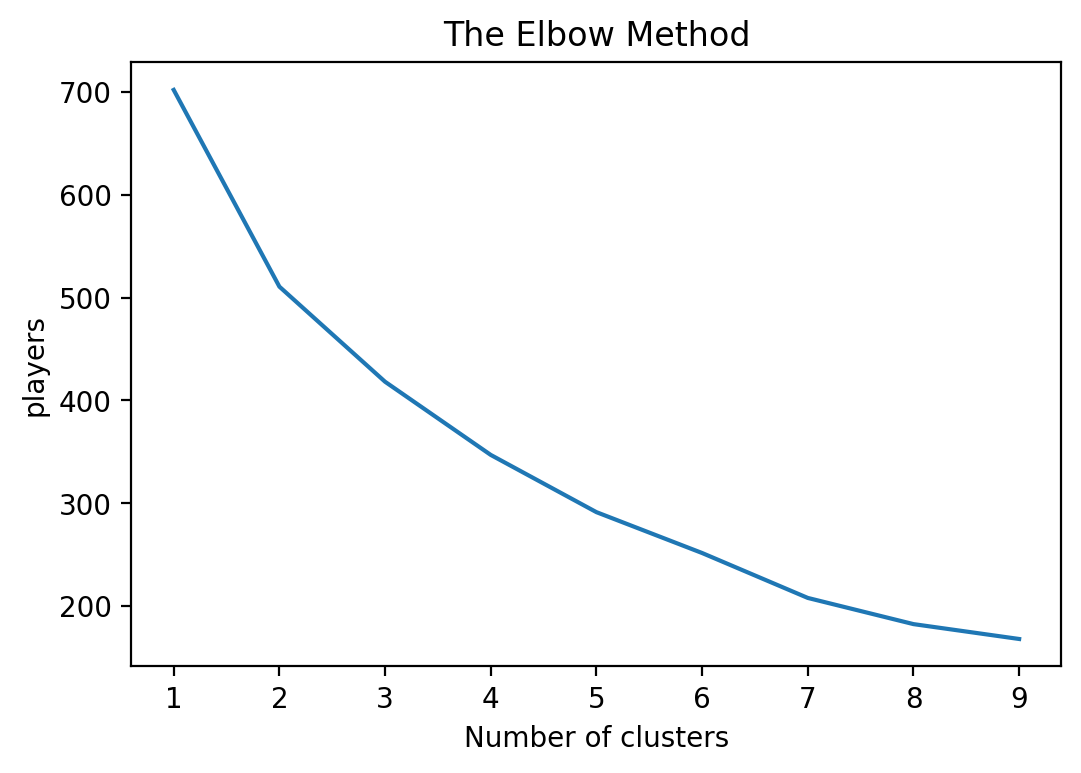

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 2, 1,
       0, 1, 1, 1])

In [28]:
kmeans.cluster_centers_

array([[-9.07425906e-02,  4.61880215e-01,  3.84307970e-17,
         4.91420530e-01,  4.83002069e-01,  2.64660094e-01,
         5.14937085e-01,  4.07381383e-01,  2.88675135e-01,
         5.55555556e-01,  1.52498570e-01,  5.64910240e-01,
         7.89798504e-02, -1.72837086e-01, -9.07425906e-02,
        -8.46153846e-01, -8.68160839e-01, -4.58585247e-01,
        -8.14580092e-01, -8.39356257e-01, -7.21920800e-01,
        -7.93328733e-01, -7.77763683e-01, -4.26401433e-01,
        -2.88675135e-01,  3.68354734e-01,  2.00000000e-01],
       [-6.35198134e-01, -9.55835446e-01,  2.46913580e-02,
        -8.72417956e-01, -9.13043385e-01, -6.75831481e-01,
        -9.30928563e-01, -7.12119748e-01, -2.88675135e-01,
        -7.77777778e-01, -2.37219998e-01, -8.37258679e-01,
        -4.54134140e-01,  3.67056455e-01, -6.35198134e-01,
         5.00000000e-01,  6.84145317e-01,  6.33284389e-01,
         5.36063056e-01,  1.00866231e+00,  2.93269448e-01,
         6.90361984e-01,  4.06562759e-01,  8.05424928e-

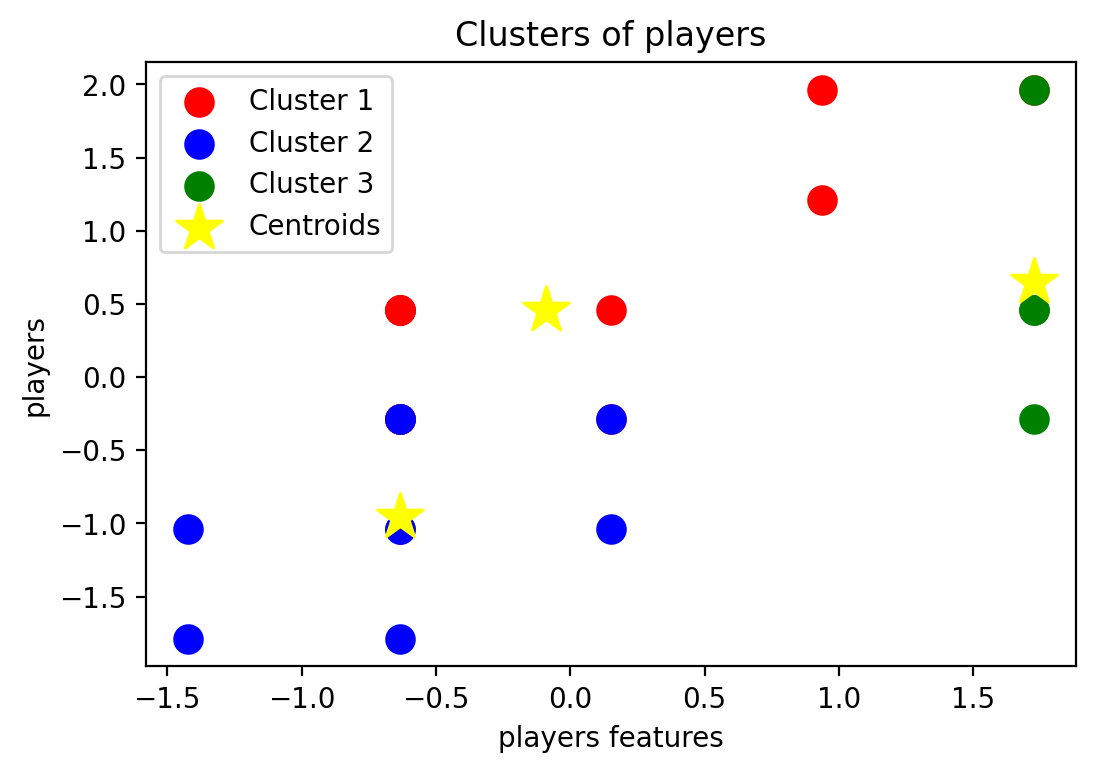

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
England_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MM Ali (ENG),6,3,0,87,30,29.00,119,73.10,0,...,119,2,1/5,59.50,5.40,66.0,0,0,4,0
1,JM Bairstow (ENG),6,5,0,291,124,58.20,239,121.75,1,...,-,-,-,-,-,-,-,-,6,1
2,SW Billings (ENG),4,2,0,21,18,10.50,30,70.00,0,...,-,-,-,-,-,-,-,-,2,0
3,JC Buttler (ENG),3,3,0,17,15,5.66,25,68.00,0,...,-,-,-,-,-,-,-,-,4,0
4,BA Carse (ENG),3,2,1,43,31,43.00,52,82.69,0,...,136,6,5/61,22.66,5.44,25.0,0,1,0,0
5,Z Crawley (ENG),3,3,1,97,58*,48.50,85,114.11,0,...,-,-,-,-,-,-,-,-,4,0
6,SM Curran (ENG),6,3,2,116,95*,116.00,112,103.57,0,...,261,7,5/48,37.28,5.71,39.1,0,1,2,0
7,TK Curran (ENG),4,1,0,11,11,11.00,16,68.75,0,...,224,6,4/35,37.33,5.60,40.0,1,0,0,0
8,L Gregory (ENG),3,2,0,117,77,58.50,116,100.86,0,...,97,4,3/44,24.25,5.10,28.5,0,0,0,0
9,LS Livingstone (ENG),3,3,1,72,36,36.00,64,112.50,0,...,20,1,1/20,20.00,6.66,18.0,0,0,1,0


In [31]:
England_2021["cluster"] = y_kmeans

In [32]:
England_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MM Ali (ENG),6,3,0,87,30,29.00,119,73.10,0,...,2,1/5,59.50,5.40,66.0,0,0,4,0,2
1,JM Bairstow (ENG),6,5,0,291,124,58.20,239,121.75,1,...,-,-,-,-,-,-,-,6,1,0
2,SW Billings (ENG),4,2,0,21,18,10.50,30,70.00,0,...,-,-,-,-,-,-,-,2,0,0
3,JC Buttler (ENG),3,3,0,17,15,5.66,25,68.00,0,...,-,-,-,-,-,-,-,4,0,0
4,BA Carse (ENG),3,2,1,43,31,43.00,52,82.69,0,...,6,5/61,22.66,5.44,25.0,0,1,0,0,1
5,Z Crawley (ENG),3,3,1,97,58*,48.50,85,114.11,0,...,-,-,-,-,-,-,-,4,0,0
6,SM Curran (ENG),6,3,2,116,95*,116.00,112,103.57,0,...,7,5/48,37.28,5.71,39.1,0,1,2,0,2
7,TK Curran (ENG),4,1,0,11,11,11.00,16,68.75,0,...,6,4/35,37.33,5.60,40.0,1,0,0,0,1
8,L Gregory (ENG),3,2,0,117,77,58.50,116,100.86,0,...,4,3/44,24.25,5.10,28.5,0,0,0,0,0
9,LS Livingstone (ENG),3,3,1,72,36,36.00,64,112.50,0,...,1,1/20,20.00,6.66,18.0,0,0,1,0,0


In [33]:
England_2021['cluster'].value_counts()

0    13
1     9
2     4
Name: cluster, dtype: int64

In [34]:
England_Cluster_2021 = np.array([13,9,4])

In [35]:
England_Cluster_2021

array([13,  9,  4])

In [36]:
%store England_Cluster_2021

Stored 'England_Cluster_2021' (ndarray)


In [37]:
England_2021_players_scaled.insert(0, 'Player', England_2021.Player)

In [38]:
England_2021_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,MM Ali (ENG),1.724109,0.461880,-0.777778,0.151970,-0.362252,-0.020925,0.659025,-0.319885,-0.288675,...,-0.502260,0.361442,-0.297003,1.874039,0.820390,2.095041,-0.426401,-0.288675,0.884051,-0.2
1,JM Bairstow (ENG),1.724109,1.962991,-0.777778,2.921889,2.226470,1.022163,2.501460,1.215976,3.464102,...,-0.502260,-0.910800,-0.968488,-0.879441,-1.118061,-0.942379,-0.426401,-0.288675,1.841774,5.0
2,SW Billings (ENG),0.151238,-0.288675,-0.777778,-0.744181,-0.692727,-0.681785,-0.707448,-0.417751,-0.288675,...,-0.502260,-0.910800,-0.968488,-0.879441,-1.118061,-0.942379,-0.426401,-0.288675,-0.073671,-0.2
3,JC Buttler (ENG),-0.635198,0.461880,-0.777778,-0.798493,-0.775345,-0.854681,-0.784216,-0.480890,-0.288675,...,-0.502260,-0.910800,-0.968488,-0.879441,-1.118061,-0.942379,-0.426401,-0.288675,0.884051,-0.2
4,BA Carse (ENG),-0.635198,-0.288675,0.666667,-0.445464,-0.334712,0.479185,-0.369668,-0.017133,-0.288675,...,-0.502260,0.543190,1.045967,0.169196,0.834749,0.208159,-0.426401,3.464102,-1.031393,-0.2
5,Z Crawley (ENG),-0.635198,0.461880,0.666667,0.287750,0.408857,0.675657,0.137002,0.974784,-0.288675,...,-0.502260,-0.910800,-0.968488,-0.879441,-1.118061,-0.942379,-0.426401,-0.288675,0.884051,-0.2
6,SM Curran (ENG),1.724109,0.461880,2.111111,0.545733,1.427822,3.086904,0.551550,0.642041,-0.288675,...,1.201057,1.879579,1.381710,0.845765,0.931671,0.857062,-0.426401,3.464102,-0.073671,-0.2
7,TK Curran (ENG),0.151238,-1.039230,-0.777778,-0.879961,-0.885504,-0.663924,-0.922399,-0.457213,-0.288675,...,-0.502260,1.484008,1.045967,0.848079,0.892184,0.898482,2.345208,-0.288675,-1.031393,-0.2
8,L Gregory (ENG),-0.635198,-0.288675,-0.777778,0.559311,0.932109,1.032879,0.612964,0.556487,-0.288675,...,0.065512,0.126237,0.374482,0.242776,0.712698,0.369234,-0.426401,-0.288675,-1.031393,-0.2
9,LS Livingstone (ENG),-0.635198,0.461880,0.666667,-0.051701,-0.197014,0.229130,-0.185425,0.923957,-0.288675,...,-0.502260,-0.696978,-0.632745,0.046099,1.272695,-0.113992,-0.426401,-0.288675,-0.552532,-0.2


In [39]:
England_2021_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,MM Ali (ENG),-0.020925,1.874039
1,JM Bairstow (ENG),1.022163,-0.879441
2,SW Billings (ENG),-0.681785,-0.879441
3,JC Buttler (ENG),-0.854681,-0.879441
4,BA Carse (ENG),0.479185,0.169196
5,Z Crawley (ENG),0.675657,-0.879441
6,SM Curran (ENG),3.086904,0.845765
7,TK Curran (ENG),-0.663924,0.848079
8,L Gregory (ENG),1.032879,0.242776
9,LS Livingstone (ENG),0.229130,0.046099


In [40]:
England_2021_Ave=England_2021_players_scaled.mean()

In [41]:
England_2021_Ave

Mat_x           1.729386e-16
Inns_x          8.540177e-18
NO              4.270089e-18
Runs_x         -1.281027e-17
HS              1.281027e-17
Ave_x          -3.629575e-17
BF             -3.416071e-17
SR_x            1.451830e-16
100            -4.697097e-17
50              1.708035e-17
0              -2.989062e-17
4s              5.551115e-17
6s              2.989062e-17
Unnamed: 0_y    1.622634e-16
Mat_y           1.729386e-16
Inns_y          0.000000e+00
Overs          -5.124106e-17
Mdns           -5.978124e-17
Runs_y          2.135044e-17
Wkts            3.843080e-17
Ave_y           1.067522e-16
Econ            4.697097e-17
SR_y            8.967186e-17
4              -3.629575e-17
5              -1.110223e-16
Ct              7.686159e-17
St             -6.618637e-17
dtype: float64

In [42]:
England_Ave_2021 =England_2021_Ave[['Ave_x','Ave_y']]

In [43]:
England_Ave_2021

Ave_x   -3.629575e-17
Ave_y    1.067522e-16
dtype: float64

In [44]:
England_Ave_2021 = np.array([England_Ave_2021.Ave_x, England_Ave_2021.Ave_y])

In [45]:
England_Ave_2021

array([-3.62957527e-17,  1.06752214e-16])

In [46]:
%store England_Ave_2021

Stored 'England_Ave_2021' (ndarray)


In [47]:
England_2021

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MM Ali (ENG),6,3,0,87,30,29.00,119,73.10,0,...,2,1/5,59.50,5.40,66.0,0,0,4,0,2
1,JM Bairstow (ENG),6,5,0,291,124,58.20,239,121.75,1,...,-,-,-,-,-,-,-,6,1,0
2,SW Billings (ENG),4,2,0,21,18,10.50,30,70.00,0,...,-,-,-,-,-,-,-,2,0,0
3,JC Buttler (ENG),3,3,0,17,15,5.66,25,68.00,0,...,-,-,-,-,-,-,-,4,0,0
4,BA Carse (ENG),3,2,1,43,31,43.00,52,82.69,0,...,6,5/61,22.66,5.44,25.0,0,1,0,0,1
5,Z Crawley (ENG),3,3,1,97,58*,48.50,85,114.11,0,...,-,-,-,-,-,-,-,4,0,0
6,SM Curran (ENG),6,3,2,116,95*,116.00,112,103.57,0,...,7,5/48,37.28,5.71,39.1,0,1,2,0,2
7,TK Curran (ENG),4,1,0,11,11,11.00,16,68.75,0,...,6,4/35,37.33,5.60,40.0,1,0,0,0,1
8,L Gregory (ENG),3,2,0,117,77,58.50,116,100.86,0,...,4,3/44,24.25,5.10,28.5,0,0,0,0,0
9,LS Livingstone (ENG),3,3,1,72,36,36.00,64,112.50,0,...,1,1/20,20.00,6.66,18.0,0,0,1,0,0
